In [ ]:
!pip install modAL
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline
import csv

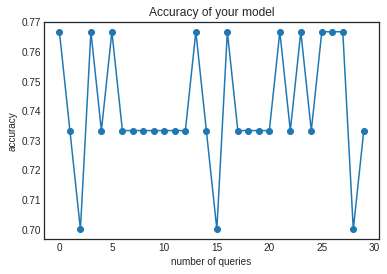

Did we forget what real heroes look like? Where is the face of the girl who didn’t quit and won Gold 
What's the label of this comment?
1
0.8559322033898306
0.9666666666666667
0.8613861386138614
0.9109947643979057
[0.7666666666666667, 0.7333333333333333, 0.7, 0.7666666666666667, 0.7333333333333333, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667, 0.7333333333333333, 0.7, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667, 0.7333333333333333, 0.7666666666666667, 0.7333333333333333, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7, 0.7333333333333333, 0.7666666666666667]
0.7666666666666667
0.7333333333333333
0.7
0.7666666666666667
0.7333333333333333
0.7666666666666667
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.73333333333333

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'simone2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = 'simone-scores2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,1:10]
y=data1[:,0]
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))
print(accuracy_scores)


for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

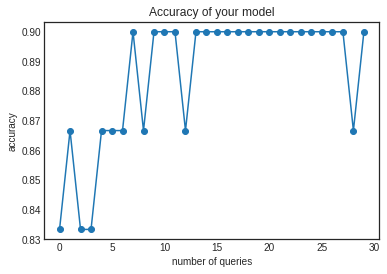

Did we forget what real heroes look like? Where is the face of the girl who didn’t quit and won Gold 
What's the label of this comment?
1
0.8833333333333333
0.9891304347826086
0.875
0.9285714285714286
[0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.9]
0.8333333333333334
0.8666666666666667
0.8333333333333334
0.8333333333333334
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.9
0.8666666666666667
0.9
0.9
0.9
0.8666666666666667
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.8666666666666667
0.9
0.9


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'simone2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BERT-simone.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:767]
y=data1[:,768]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))
print(accuracy_scores)


for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

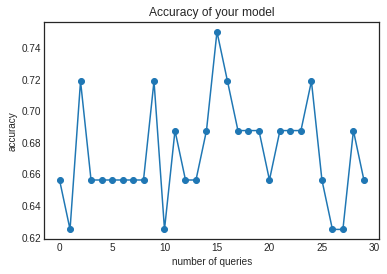

"Haha
What's the label of this comment?
0
0.792
0.7317073170731707
0.6666666666666666
0.6976744186046511


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'tahani2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = 'tahani-scores2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,1:10]
y=data1[:,0]
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))


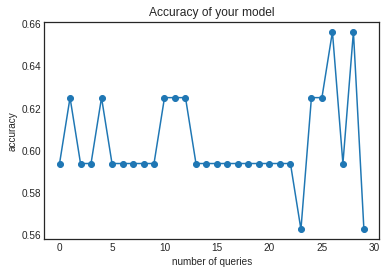

"fuck her
What's the label of this comment?
1
0.7380952380952381
0.5
0.6363636363636364
0.56


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'tahani2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BERT-tahani.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:767]
y=data1[:,768]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))


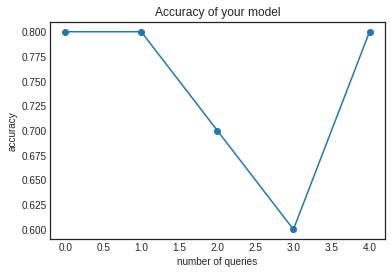

"Good way to embarrass yourself and the country
What's the label of this comment?
1
0.9230769230769231
0.9166666666666666
0.9565217391304348
0.9361702127659574


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 20

filename = 'laura2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = 'laura-scores2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,1:10]
y=data1[:,0]
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 5

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))


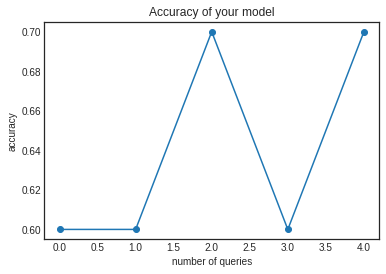

She should try testosterone.
What's the label of this comment?
1
0.8
1.0
0.7575757575757576
0.8620689655172413


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 20

filename = 'laura2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BERT-laura.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:767]
y=data1[:,768]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 5

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))


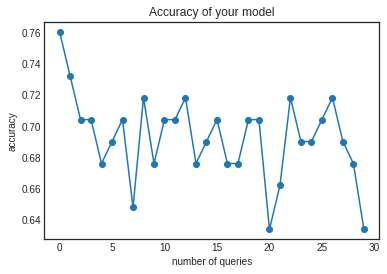

Wah wah pay attention to poor me. Why are we still hearing about this quitter who only showed up for the free vacation and publicity. 
What's the label of this comment?
1
0.7907801418439716
0.8838709677419355
0.7696629213483146
0.8228228228228228
0.7605633802816901
0.7323943661971831
0.704225352112676
0.704225352112676
0.676056338028169
0.6901408450704225
0.704225352112676
0.647887323943662
0.7183098591549296
0.676056338028169
0.704225352112676
0.704225352112676
0.7183098591549296
0.676056338028169
0.6901408450704225
0.704225352112676
0.676056338028169
0.676056338028169
0.704225352112676
0.704225352112676
0.6338028169014085
0.6619718309859155
0.7183098591549296
0.6901408450704225
0.6901408450704225
0.704225352112676
0.7183098591549296
0.6901408450704225
0.676056338028169
0.6338028169014085
0.6901408450704225


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 90

filename = 'total-sport2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = 'total-sport-scores2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,1:10]
y=data1[:,0]
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

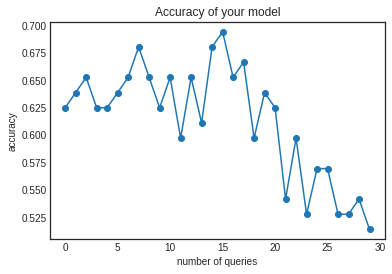

She a quiter and an embarrassment
What's the label of this comment?
1
0.7027972027972028
0.9874213836477987
0.6541666666666667
0.7869674185463659
0.625
0.6388888888888888
0.6527777777777778
0.625
0.625
0.6388888888888888
0.6527777777777778
0.6805555555555556
0.6527777777777778
0.625
0.6527777777777778
0.5972222222222222
0.6527777777777778
0.6111111111111112
0.6805555555555556
0.6944444444444444
0.6527777777777778
0.6666666666666666
0.5972222222222222
0.6388888888888888
0.625
0.5416666666666666
0.5972222222222222
0.5277777777777778
0.5694444444444444
0.5694444444444444
0.5277777777777778
0.5277777777777778
0.5416666666666666
0.5138888888888888
0.5555555555555556


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 90

filename = 'total-sport2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BERT-total-sport.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:767]
y=data1[:,768]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))


for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

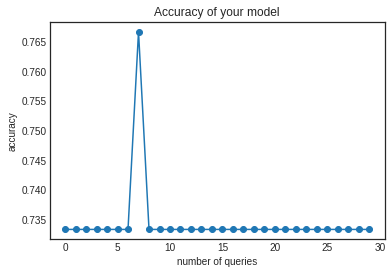

"Why she is still there??? Girl
What's the label of this comment?
1
0.8583333333333333
0.9891304347826086
0.8504672897196262
0.914572864321608
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7666666666666667
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'simone2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BOW-simone.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:2435]
y=data1[:,2436]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

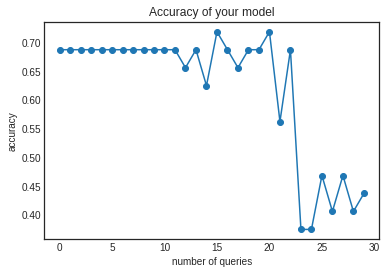

"If she refused to play with Zionism
What's the label of this comment?
1
0.6587301587301587
0.8809523809523809
0.49333333333333335
0.6324786324786325


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'tahani2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BOW-tahani.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:3447]
y=data1[:,3448]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

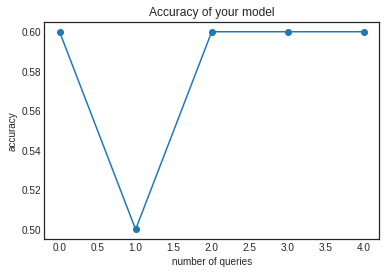

All jerk and no snatch
What's the label of this comment?
1
0.85
1.0
0.8064516129032258
0.8928571428571428


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 20

filename = 'laura2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BOW-laura.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:995]
y=data1[:,996]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 5

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

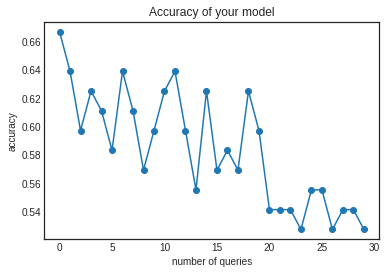

"This is the new trend. “Give Up” no more perseverance. No more work ethic. This is the message that will be sent to all the weak minded. Life is hard… so just quit. She is not the first this year to do this
What's the label of this comment?
1
0.7202797202797203
0.9874213836477987
0.6680851063829787
0.7969543147208121
0.6666666666666666
0.6388888888888888
0.5972222222222222
0.625
0.6111111111111112
0.5833333333333334
0.6388888888888888
0.6111111111111112
0.5694444444444444
0.5972222222222222
0.625
0.6388888888888888
0.5972222222222222
0.5555555555555556
0.625
0.5694444444444444
0.5833333333333334
0.5694444444444444
0.625
0.5972222222222222
0.5416666666666666
0.5416666666666666
0.5416666666666666
0.5277777777777778
0.5555555555555556
0.5555555555555556
0.5277777777777778
0.5416666666666666
0.5416666666666666
0.5277777777777778
0.5416666666666666


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 90

filename = 'total-sport2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/BOW-total.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:6069]
y=data1[:,6070]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])

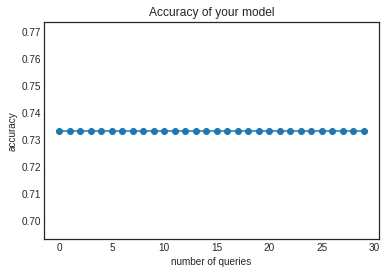

Just sent her home!! She is scared as hell to compete
What's the label of this comment?
1
0.825
0.9891304347826086
0.8198198198198198
0.8965517241379309


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'simone2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/W2V-simone.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:299]
y=data1[:,300]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

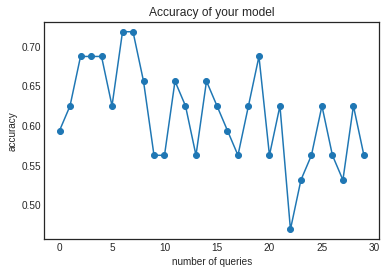

"Regardless of the state and politics
What's the label of this comment?
0
0.7063492063492064
0.8095238095238095
0.5396825396825397
0.6476190476190475


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'tahani2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/W2V-tahani.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:299]
y=data1[:,300]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

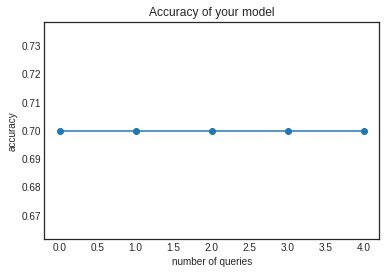

"Well of course he's gonna make history. No man has ever faced a woman in the Olympics! Not just history
What's the label of this comment?
1
0.85
1.0
0.8064516129032258
0.8928571428571428


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 20

filename = 'laura2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/W2V-laura.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:299]
y=data1[:,300]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 5

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

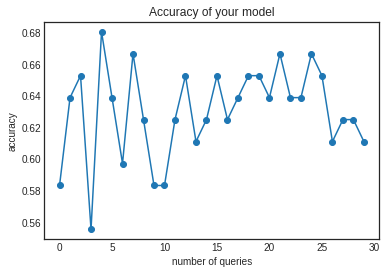

How about he is an embarrassment for attempting to shame someone who is putting their mental health first! 
What's the label of this comment?
1
0.6328671328671329
0.9874213836477987
0.6038461538461538
0.7494033412887827
0.5833333333333334
0.6388888888888888
0.6527777777777778
0.5555555555555556
0.6805555555555556
0.6388888888888888
0.5972222222222222
0.6666666666666666
0.625
0.5833333333333334
0.5833333333333334
0.625
0.6527777777777778
0.6111111111111112
0.625
0.6527777777777778
0.625
0.6388888888888888
0.6527777777777778
0.6527777777777778
0.6388888888888888
0.6666666666666666
0.6388888888888888
0.6388888888888888
0.6666666666666666
0.6527777777777778
0.6111111111111112
0.625
0.625
0.6111111111111112
0.6111111111111112


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

n_initial = 50

filename = 'total-sport2.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
tex = list(reader1)
tex=tex[1:]
#print(td1[1][0])


filename = '/content/W2V-total.csv'
raw_data = open(filename, 'rt')
reader1 = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
td1 = list(reader1)

print()
 # select columns 1 through end
data1 = np.array(td1).astype('float')
X=data1[:,0:299]
y=data1[:,300]
y = np.array(y).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
earner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 30

accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        id=int(str(query_idx)[1:-1])
   
        print(tex[id][0])

    print("What's the label of this comment?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))
y_pred=learner.predict(X)
print(accuracy_score(y,  y_pred))
print(recall_score(y,  y_pred))
print(precision_score(y,  y_pred))
print(f1_score(y,  y_pred))

for i in range(0,len(accuracy_scores)):
  print(accuracy_scores[i])